In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import h5py

In [3]:
from scipy.stats import norm

In [47]:
# rs=np.arange(143,191) #100% DMSO
# rs=np.arange(192,239) #H2O
rs=np.arange(248,301) # 67% DMSO

In [48]:
#Load arrays

I_arrays=[]
delay_arrays=[]
d1_arrays=[]

for i in rs:
    try:
        hf=h5py.File(f'../shared/jungfrau_Iq/run{i}_Iq.h5')
        I_array =  xr.DataArray(hf['Iq'][:]).rename({'dim_0':'shot','dim_1':'q'})
        I_array=I_array.assign_coords({'q':hf['common_q'][:],'shot':I_array.shot})
        delay_array = xr.DataArray(hf['delay_ps'][:]).rename({'dim_0':'shot'})
        hf.close()
        
#         hf=h5py.File(f'../../hdf5/smalldata/xppl1001021_Run{i:04}.h5')
# #         h5py.File(f'../../hdf5/smalldata/xppl1001021_Run{i:04}.h5')
#         d1=xr.DataArray(hf['ipm2/sum'][:]).rename({'dim_0':'shot'})
#         hf.close()
        
        I_arrays.append(I_array)
        delay_arrays.append(delay_array)
#         d1_arrays.append(d1)
        print('added',i)
    except:
        print('Skipped',i)
#         pass

added 248
Skipped 249
Skipped 250
Skipped 251
added 252
added 253
added 254
added 255
added 256
added 257
added 258
Skipped 259
added 260
added 261
added 262
added 263
Skipped 264
added 265
added 266
added 267
Skipped 268
added 269
added 270
added 271
added 272
added 273
added 274
added 275
added 276
added 277
added 278
added 279
added 280
added 281
added 282
added 283
added 284
added 285
added 286
added 287
added 288
added 289
added 290
added 291
added 292
added 293
added 294
added 295
added 296
added 297
added 298
added 299
added 300


In [49]:
# concatenate along unique shots

Iarr=xr.concat(I_arrays,dim='shot')
delarr=xr.concat(delay_arrays,dim='shot')
# d1arr=xr.concat(d1_arrays,dim='shot')

In [50]:
#dataset with I's and delays
ds=xr.Dataset({'I':Iarr,'delay':delarr})#,'d1':d1arr})

In [51]:
ds

<xarray.Dataset>
Dimensions:  (q: 1024, shot: 982561)
Coordinates:
  * q        (q) float64 1.202 1.205 1.209 1.212 ... 4.769 4.772 4.776 4.779
  * shot     (shot) int64 0 1 2 3 4 5 6 ... 19997 19998 19999 20000 20001 20002
Data variables:
    I        (shot, q) float32 -0.01614 0.02153 0.01645 ... 0.1529 -0.03443
    delay    (shot) float64 0.1687 0.1687 0.1687 0.1687 ... 2.575 2.575 2.575

In [52]:
#total scattering intensity
tot=(ds.I*ds.q**2).sel(q=slice(3.5,5)).integrate(coord='q')

In [53]:
#add to dataset 
ds=ds.assign({'tot_scat':tot})

In [54]:
#Pick intensity source
# intsrc='d1'
intsrc='tot_scat'

(array([3.63335e+05, 7.91630e+04, 5.55270e+04, 4.62190e+04, 4.01050e+04,
        3.56830e+04, 3.23080e+04, 2.95220e+04, 2.67490e+04, 2.45490e+04,
        2.22150e+04, 2.03530e+04, 1.86650e+04, 1.69700e+04, 1.54720e+04,
        1.42540e+04, 1.28090e+04, 1.18350e+04, 1.07810e+04, 9.71900e+03,
        9.06000e+03, 8.06900e+03, 7.55600e+03, 6.77300e+03, 6.34300e+03,
        5.61900e+03, 5.07400e+03, 4.67100e+03, 4.27000e+03, 3.85000e+03,
        3.50000e+03, 3.10400e+03, 2.86300e+03, 2.56000e+03, 2.37400e+03,
        2.16100e+03, 1.88300e+03, 1.74300e+03, 1.61000e+03, 1.39200e+03,
        1.28100e+03, 1.15800e+03, 1.05300e+03, 9.17000e+02, 8.30000e+02,
        6.98000e+02, 6.41000e+02, 6.21000e+02, 5.21000e+02, 4.56000e+02,
        3.85000e+02, 3.93000e+02, 3.40000e+02, 2.94000e+02, 2.51000e+02,
        2.46000e+02, 2.23000e+02, 2.12000e+02, 1.55000e+02, 1.49000e+02,
        1.26000e+02, 1.26000e+02, 1.15000e+02, 7.40000e+01, 6.60000e+01,
        5.00000e+01, 6.20000e+01, 5.60000e+01, 5.40

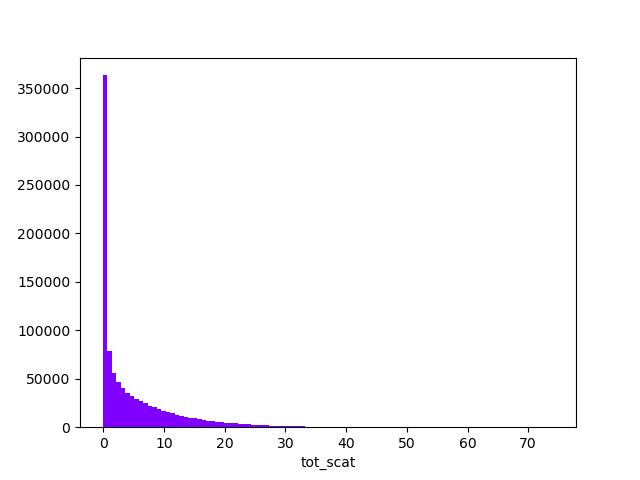

In [55]:
#plot total scattering histogram
plt.figure()
# ds.tot_scat.plot.hist(bins=100)
ds[intsrc].plot.hist(bins=100)

In [56]:
# quant=1-1e-1
thrsh=10#ds.tot_scat.quantile(quant,dim='shot')

In [57]:
#drop shots under threshold
#high intensity shots
ds_dropped=ds.where(ds[intsrc]>thrsh,drop=True)#.mean(dim='run')

# #low intensity shots
# cond=(ds[intsrc]<thrsh) & (ds[intsrc]>1)
# ds_dropped=ds.where(cond,drop=True)#.mean(dim='run')


In [58]:
ds_dropped

<xarray.Dataset>
Dimensions:   (shot: 177175, q: 1024)
Coordinates:
  * q         (q) float64 1.202 1.205 1.209 1.212 ... 4.769 4.772 4.776 4.779
  * shot      (shot) int64 2 5 6 10 12 13 ... 19969 19976 19982 19984 19998
Data variables:
    I         (shot, q) float32 1.58 1.09 1.603 1.849 ... -0.04802 0.5339 2.923
    delay     (shot) float64 0.1687 0.1687 0.1687 ... 0.7337 0.7337 0.7222
    tot_scat  (shot) float64 14.96 13.38 11.35 12.08 ... 12.87 20.74 10.14 16.72

In [59]:
# bin by delay
nd=10 #number of delay bins
binned=ds_dropped.groupby_bins('delay',nd).mean()#.mean(dim='run')

In [60]:
#normalize averages by average shot intensity
binned=binned.assign({'I_n':binned.I/binned.tot_scat})

In [61]:
# unit='q_A^-1'
yl=r'$ I(q)$'
xl=r'$q\quad \left[\mathrm{\AA^{-1}}\right]$'

In [62]:
binned.delay

<xarray.DataArray 'delay' (delay_bins: 10)>
array([-5.59644   ,         nan,         nan,         nan,         nan,
               nan,  0.11265205,  0.66900865,  1.50723699,  2.37049843])
Coordinates:
  * delay_bins  (delay_bins) object (-5.605, -4.761] ... (1.925, 2.761]

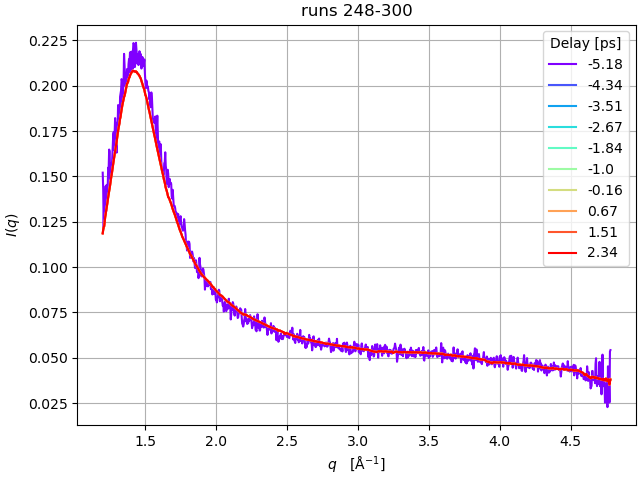

In [63]:
# N=binned.delay_bins.size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0,1,nd)))

fig,ax=plt.subplots(constrained_layout=True)

t0 = binned.I_n[0]
for subarr in binned.I_n:
    x=subarr.q#[i.item().mid for i in subarr.q]
    y= subarr#-t0#)#/t0#/subarr.max()
    ax.plot(x,y,label=np.round(subarr.delay_bins.item().mid,2))
#     ax.plot(x,normed,label=subarr.delay_bins.item().mid)
ax.set(xlabel=xl,ylabel=yl)
ax.grid()
ax.set_title(f'runs {np.min(rs)}-{np.max(rs)}')
ax.legend(title='Delay [ps]')#,loc='lower center')#,ncol=4)